# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import config
import os

In [2]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# CAG counts

In [3]:
clusters = pd.read_csv(os.path.join(config.RAW_DIR, "clusters_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None)
clusters

,1
0,
CAG00001,UniRef90_A0A378A6L7
CAG00001,UniRef90_A0A2X1RLT4
CAG00001,UniRef90_A0A333FLJ3
CAG00001,UniRef90_V5ADF3
CAG00001,UniRef90_UPI000A3C0D9B
...,...
CAG27816,UniRef90_A0A148HQ34
CAG27817,UniRef90_UPI0002A368F9
CAG27817,UniRef90_A0A2X3M0Q2


In [4]:
counts = clusters.groupby(level=0).count()
counts

,1
0,
CAG00001,11642
CAG00002,4384
CAG00003,3993
CAG00004,3677
CAG00005,3259
...,...
CAG27814,2
CAG27815,2
CAG27816,2


In [5]:
(counts.iloc[:, 0] > 700).sum()

180

Text(0, 0.5, '\\# of genes in CAG (log10)')

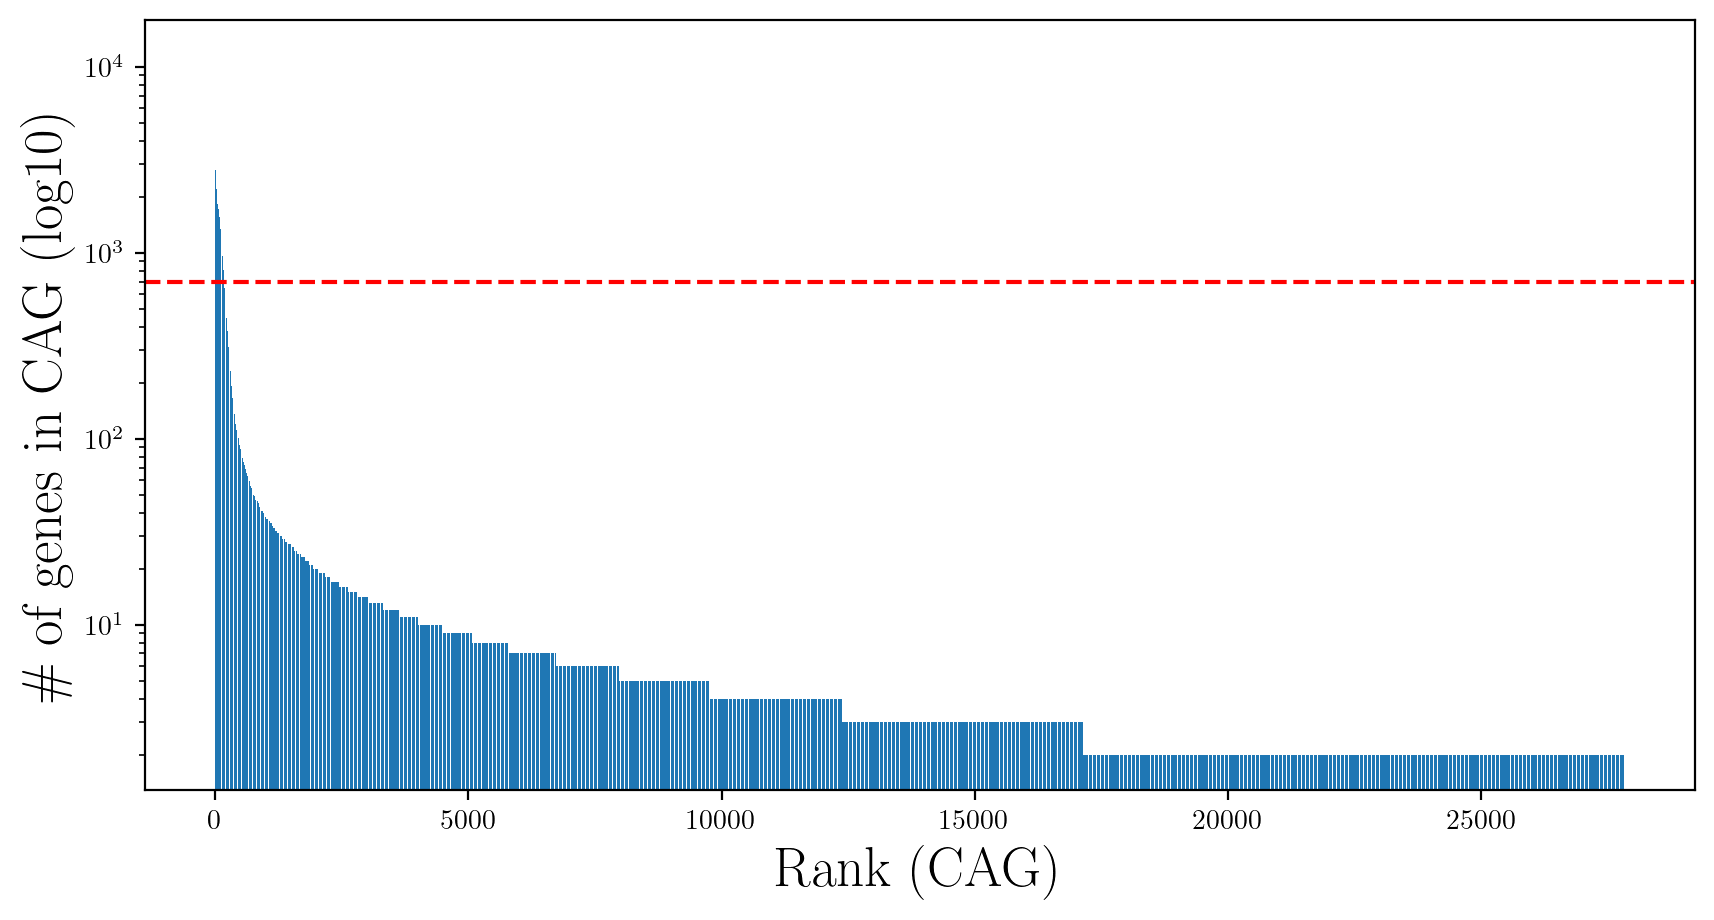

In [6]:
plt.figure(figsize=(10, 5), dpi=200)
num_cags = counts.shape[0]
plt.bar(range(num_cags), counts.values.flatten())
plt.yscale("log")
plt.axhline(y=700, color='r', linestyle='--')
plt.xlabel("Rank (CAG)", fontsize=20)
plt.ylabel("\# of genes in CAG (log10)", fontsize=20)

# profiles

In [13]:
metadata = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t", index_col=0)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388


In [14]:
CAG = pd.read_csv(os.path.join(config.RAW_DIR, "profiles_allgenes_inputfilter.txt"), sep="\t", index_col=0, header=None).iloc[:, :-1]
CAG.columns = metadata.index
CAG

Sample_ID,magic.0001,magic.0004,magic.0006,magic.0007,magic.0008,magic.0010,magic.0011,magic.0012,magic.0013,magic.0014,...,magic.6590,magic.6591,magic.6592,magic.6593,magic.6594,magic.6595,magic.6597,magic.6598,magic.6599,magic.6600
0,,,,,,,,,,,,,,,,,,,,,
CAG00001,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00002,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00003,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00004,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000010,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG00005,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000071,0.000000,0.000024,0.000041,0.000015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG27814,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CAG27815,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.0,0.0,...,0.000000,0.000091,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.0,0.0
CAG27816,0.000000,0.000000,0.000000e+00,0.000146,0.000089,0.000000e+00,0.0,0.000238,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [15]:
species = pd.read_csv("../data/raw/species_rarefied.txt", sep="\t")
species

,magic.0007,magic.0008,magic.0010,magic.0012,magic.0014,magic.0017,magic.0019,magic.0022,magic.0023,magic.0024,...,magic.6590,magic.6591,magic.6592,magic.6593,magic.6594,magic.6595,magic.6597,magic.6598,magic.6599,magic.6600
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,105,1,3533,58,44507,100,89,159,1786,82222,...,5,6,6,13,19,7,6,6,7,15
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,228,144,148,526,15062,97,15848,910,878,0,...,32,7468,16,21,5,312,7,14,8,2
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,39403,23646,26439,80131,760790,11451,846753,253540,1080,28,...,14553,511,1352,92,6788,283,31,2493,1280,22
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,925,537,2166,1518,5379,237,5751,21371,14,0,...,359,12,173,1,1173,7,9,43,87,0
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,170947,107325,19611,367871,34244,53225,33157,188699,406,33,...,2913,152,1238,49,12137,64,60,219,758,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
metadata = metadata.loc[species.columns]
CAG = CAG[species.columns]

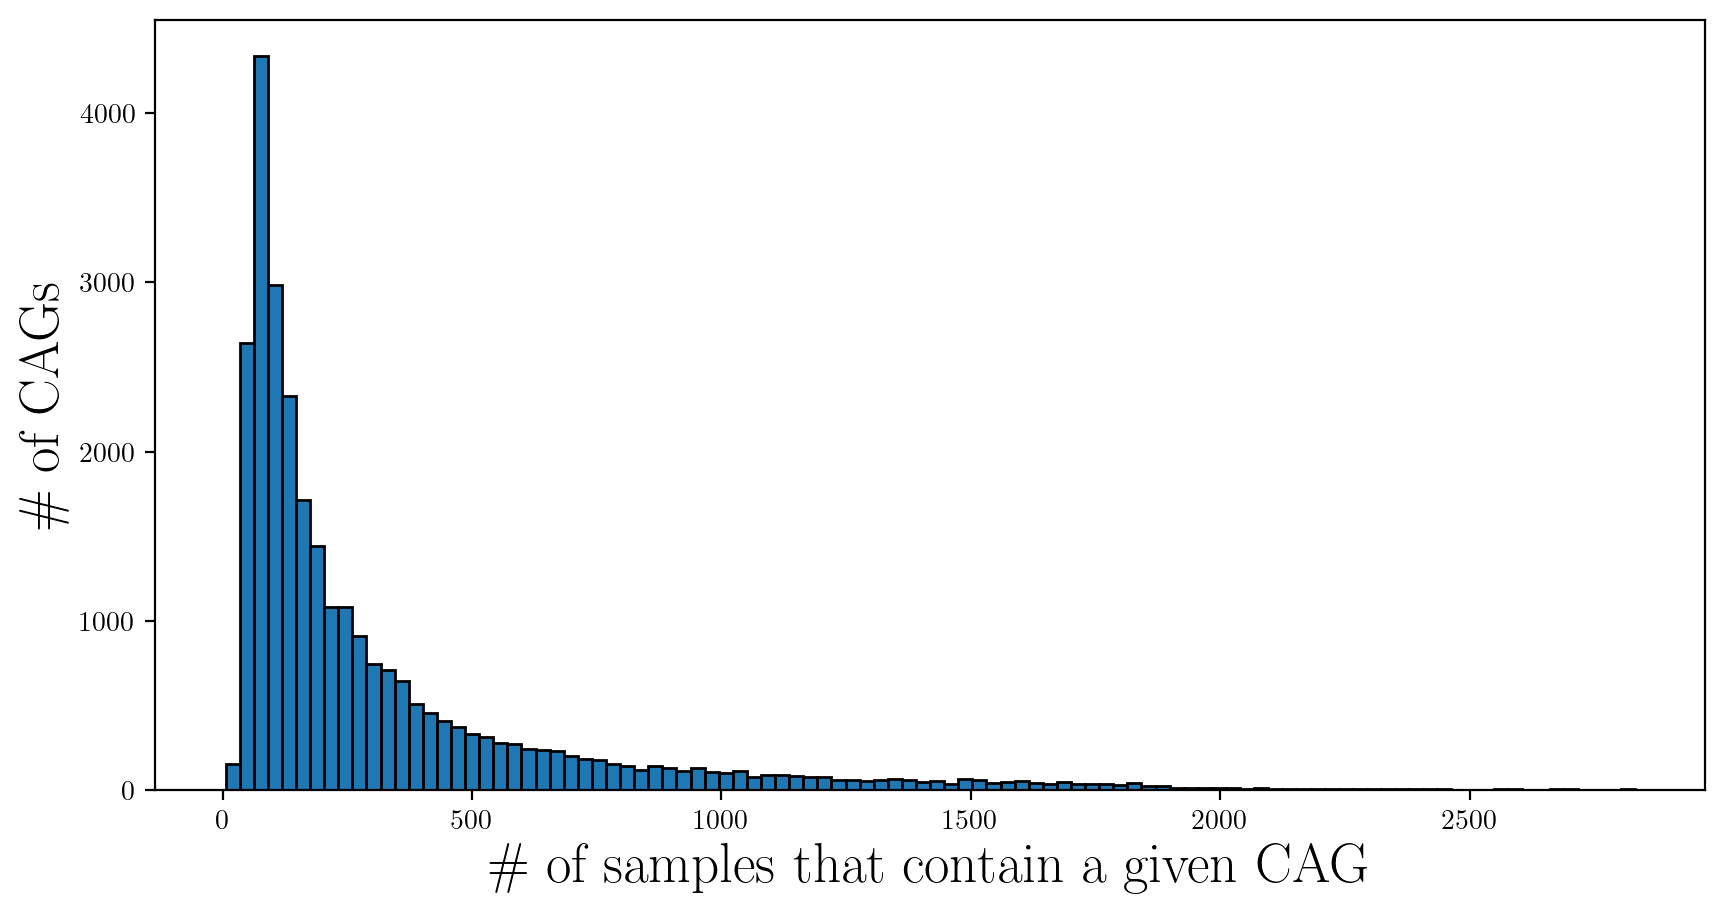

In [22]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist((CAG > 0).sum(axis=1), bins=100, edgecolor="black")

plt.xlabel("\# of samples that contain a given CAG", fontsize=20)
plt.ylabel("\# of CAGs", fontsize=20)

plt.show()

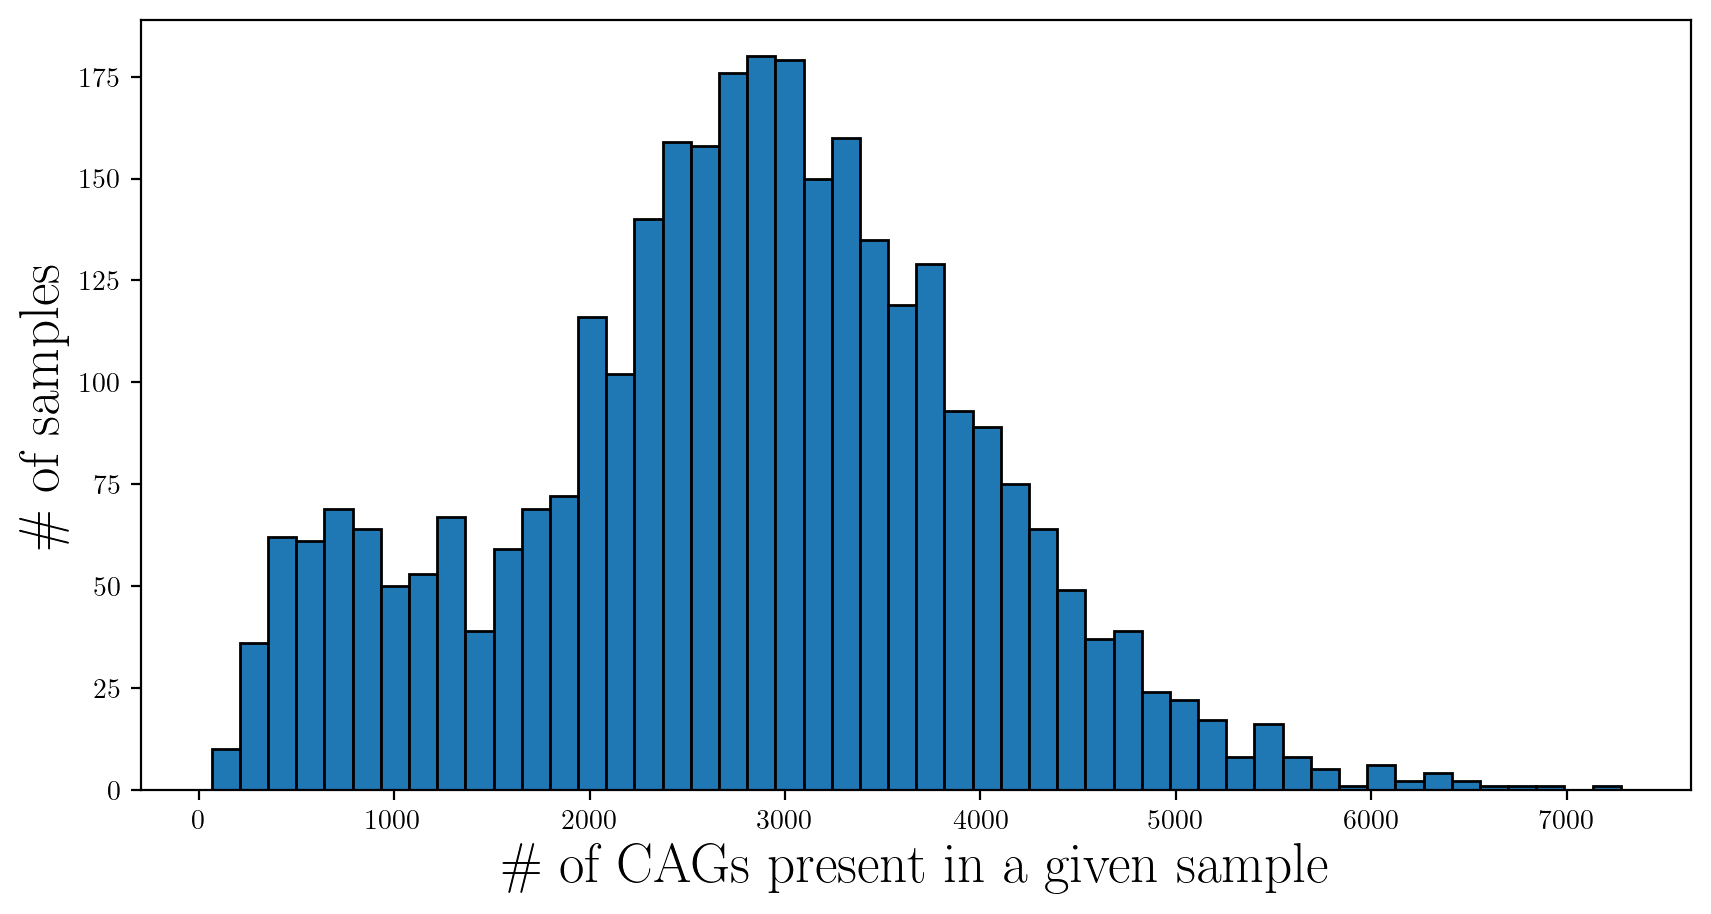

In [23]:
plt.figure(figsize=(10, 5), dpi=200)

CAG_presence = (CAG.T > 0)
counts = CAG_presence.sum(axis=1)

plt.hist(counts, bins=50, edgecolor="black")
plt.xlabel("\# of CAGs present in a given sample", fontsize=20)
plt.ylabel("\# of samples", fontsize=20)

plt.show()

In [24]:
counts = clusters.groupby(level=0).count()
MGS_CAGs = counts[(counts.iloc[:, 0] > 700)].index
nonMGS_CAGs = counts[(counts.iloc[:, 0] <= 700)].index

In [25]:
all_cags = counts.index
all_cags

Index(['CAG00001', 'CAG00002', 'CAG00003', 'CAG00004', 'CAG00005', 'CAG00006',
       'CAG00007', 'CAG00008', 'CAG00009', 'CAG00010',
       ...
       'CAG27809', 'CAG27810', 'CAG27811', 'CAG27812', 'CAG27813', 'CAG27814',
       'CAG27815', 'CAG27816', 'CAG27817', 'CAG27818'],
      dtype='object', name=0, length=27818)

Sample_ID,magic.0007,magic.0008,magic.0010,magic.0024,magic.0025,magic.0026,magic.0027,magic.0031,magic.0033,magic.0034,...,magic.2203,magic.2205,magic.2522,magic.2562,magic.2580,magic.2863,magic.3478,magic.3692,magic.4872,magic.5088
0,,,,,,,,,,,,,,,,,,,,,
CAG00001,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.0,0.000014,0.000000,0.0,0.0,0.00000
CAG00002,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000
CAG00003,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000
CAG00004,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000
CAG00005,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAG27814,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000
CAG27815,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000e+00,0.000002,0.0,0.000000,0.000000,0.0,0.0,0.00000
CAG27816,0.000146,0.000089,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.0,0.000022,0.000000,0.0,0.0,0.00000


In [32]:
has_CAGs = {}
for week in range(5):
    curr_CAG = CAG[metadata[metadata["Timeline_Weeks"] == str(week)].index]
    has_CAG = {c : (curr_CAG.loc[c] > 0).values.flatten() for c in all_cags}
    has_CAGs[week] = has_CAG

In [36]:
len(has_CAGs)

5

In [52]:
# len(has_CAG)

In [53]:
# has_CAG[all_cags[0]]

# Detect dependencies

In [37]:
ass_dicts = {}

In [38]:
from scipy.stats import fisher_exact
from sklearn.metrics import matthews_corrcoef
from tqdm import tqdm

for week in range(5):
    has_CAG = has_CAGs[week]

    ass_dict = []
    for CAG1 in tqdm(all_cags):
        has_CAG1 = has_CAG[CAG1]

        for CAG2 in all_cags:
            if CAG1 == CAG2: continue

            has_CAG2 = has_CAG[CAG2]

            tr = (~has_CAG1 & has_CAG2).sum()
            prop = tr / has_CAG2.sum()
            if prop > 0.01: continue

            table = (
                [[(has_CAG1 & has_CAG2).sum(), tr],
                 [(has_CAG1 & ~has_CAG2).sum(), (~has_CAG1 & ~has_CAG2).sum()]
                ]
            )

            p = fisher_exact(table, "greater").pvalue
            ass_dict.append({"host" : CAG1, "dependent" : CAG2, "p" : p, "prop" : prop})
    
    ass_dicts[week] = ass_dict

  0%|                                                                     | 0/27818 [00:00<?, ?it/s]/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_9266/2118783714.py:18: RuntimeWarning: invalid value encountered in scalar divide
  prop = tr / has_CAG2.sum()
  0%|                                                          | 29/27818 [00:16<4:29:40,  1.72it/s]


KeyboardInterrupt: 